In [2]:
import numpy as np
from scipy.io import loadmat
from scipy import optimize
import utils

import re #Regular expressions to process emails

#Plotting Libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from IPython.display import HTML, display, clear_output
try:
    plt.rcParams["animation.html"] = "jshtml"
except ValueError:
    plt.rcParams["animation.html"] = "html5"
    
%load_ext autoreload
%autoreload 2

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 1.1.1 Cluster Assignment Step 

In [24]:
def findClosestCentroids(X, centroids):
    m= X.shape[0] #No. of training examples
    K= centroids.shape[0] #No.of centroids
    idx= np.zeros(m, dtype=int) #Vector containing centroid number for each data set
    
    for i in range(m):
        norm= float('inf')
        
        for j in range(K):
            if norm>= np.linalg.norm(X[i]-centroids[j])**2:
                norm= np.linalg.norm(X[i]- centroids[j])**2
                idx[i]=j
                
    return idx            

In [6]:
data= loadmat('ex7data2.mat')
X=data['X']

# Select an initial set of centroids
K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0. 2. 1.]
(the closest centroids should be 0, 2, 1 respectively)


In [7]:
grader[1]= findClosestCentroids
grader.grade()


Submitting Solutions | Programming Exercise k-means-clustering-and-pca

Login (email address): kunind444@gmail.com
Token: WTJuu6LxXLAxuKO7
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
           Find Closest Centroids (k-Means) |  30 /  30 | Nice work!
           Compute Centroid Means (k-Means) |   0 /  30 | 
                                        PCA |   0 /  20 | 
                         Project Data (PCA) |   0 /  10 | 
                         Recover Data (PCA) |   0 /  10 | 
                                  --------------------------------
                                            |  30 / 100 |  



## 1.1.2 Move Centroid Step 

In [16]:
def computeCentroids(X, idx, K):
    n= X.shape[1] #No, of parameters
    centroids= np.zeros((K,n))
    
    for i in range(K):
        centroids[i,:]=np.mean(X[idx==i,:], axis=0)
        
    return centroids

In [17]:
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


In [18]:
grader[2]=computeCentroids
grader.grade()


Submitting Solutions | Programming Exercise k-means-clustering-and-pca

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
           Find Closest Centroids (k-Means) |  30 /  30 | Nice work!
           Compute Centroid Means (k-Means) |  30 /  30 | Nice work!
                                        PCA |   0 /  20 | 
                         Project Data (PCA) |   0 /  10 | 
                         Recover Data (PCA) |   0 /  10 | 
                                  --------------------------------
                                            |  60 / 100 |  



# 1.2 K-means on Example Dataset 
After you have completed the two functions (findClosestCentroids and computeCentroids), you have all the necessary pieces to run the K-means algorithm. The next cell will run the K-means algorithm on a toy 2D dataset to help you understand how K-means works. Your functions are called from inside the **runKmeans** function (in this assignment's utils.py module). We encourage you to **take a look at the function to understand how it works. Notice that the code calls the two functions you implemented in a loop.**

**When you run the next step, the K-means code will produce an animation that steps you through the progress of the algorithm at each iteration.**

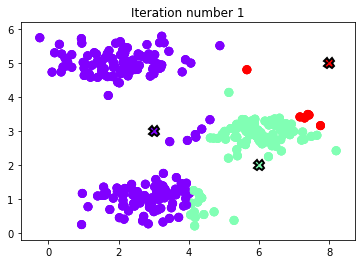

In [19]:
# Load an example dataset
data = loadmat( 'ex7data2.mat')

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])


# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx, anim = utils.runkMeans(X, initial_centroids,
                                       findClosestCentroids, computeCentroids, max_iters, True)
anim

# 1.3 Random Initializations
The initial assignments of centroids for the example dataset in the previous cell were designed so that you will see the same figure as that shown in the cell above. In practice, a good strategy for initializing the centroids is to select random examples from the training set.

In [20]:
def kMeansInitCentroids(X, K):
    m= X.shape[0] #No. of training examples 
    randidx= np.random.permutation(m)
    centroids= X[randidx[:K],:]
    
    return centroids

# 1.4 Image Compression with K-means 
In a straightforward **24-bit color representation** of an image, **each pixel** is represented as **three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values.** This encoding is often referred to as the **RGB** encoding. Our **image contains thousands of color**s, and in this part of the exercise, you will **reduce the number of colors to 16 colors.**

## 1.4.1 K-means on Pixels
After finding the top K = 16 colors to represent the image, you can now assign each pixel position to its closest centroid using the findClosestCentroids function. This **allows you to represent the original image using the centroid assignments of each pixel.** Notice that you have significantly reduced the number of bits that are required to describe the image. The original image required **24 bits** for each one of the **128 x 128 pixel** locations, resulting in **total size of 128 x 128 x 24 = 393,216 bits.** The new representation requires some overhead storage in form of a **dictionary of 16 colors, each of which require 24 bits**, but the **image itself then only requires 4 bits per pixel location to represent one of the 16 colours chosen. The final number of bits used is therefore 16 x 24 + 128 x 128 x 4 = 65,920 bits**, which corresponds to compressing the original image by about a factor of 6.

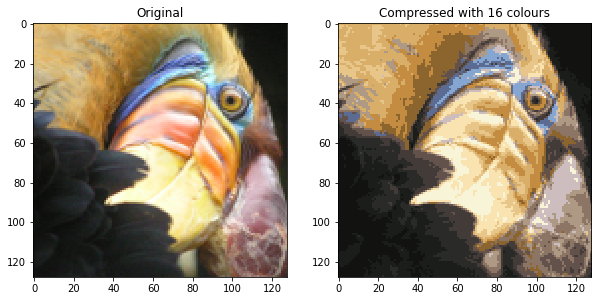

In [28]:
K=16 #No. of clusters i.e total no. of colurs in the compressed image
max_iters=10 
img= mpl.image.imread('bird_small.png') #Reading in an image and storing it in a variable A

img/=255 #So that all values are in the range 0-1
#A is a 3D matrix, so we then reshape it into a vetor N x 3 where N= TOTAL NO. OF PIXELS

#The code in the following cell first loads the image, and then reshapes it 
#to create an m x 3 matrix of pixel colors (where m = 16384 = 128 x 128), and calls your K-means function on it.
X=img.reshape(-1,3)

initial_centroids= kMeansInitCentroids(X, K) #Random Initialisation of Centroids

#RUN K-Means Algorithm
#dim(idx) = (m,) dim(centroids)= 12 x 3
centroids, idx = utils.runkMeans(X, initial_centroids, findClosestCentroids, computeCentroids, max_iters)

#Reconstructs the entire original picture with only the centroids of the 
#respective cluster centroids of the pixels, basically with the 16 colours chosen by the K-means Algorithm
X_recovered= centroids[idx,:].reshape(img.shape)

fig,ax= plt.subplots(1,2, figsize=(10,5))
#Rescale the original image back by 255 since we had earlier divided it by 255
ax[0].imshow(img*255)
ax[0].set_title('Original')
ax[0].grid(False)

#Rescale the new compressed image by 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].grid(False)

# Principle Component Analysis

## 2.1 Example Dataset
To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The cell below will plot the training data, also shown in here:

In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

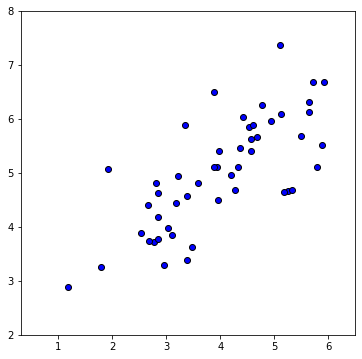

In [12]:
data= loadmat('ex7data1.mat')
X=data['X']

plt.figure(figsize=(6,6))
plt.plot(X[:,0], X[:,1],'bo',marker='omec='black')
plt.axis([0.3, 6.5, 2, 8])
plt.gca().set_aspect('equal')
plt.grid(False)
plt.show();

## 2.1 Implementing PCA 

2.2 Implementing PCA
In this part of the exercise, you will implement PCA. PCA consists of two computational steps:

1. Compute the covariance matrix of the data.
1. Use SVD (in python we use numpy's implementation np.linalg.svd) to compute the eigenvectors $U_1$, $U_2$, $\dots$, $U_n$. These will correspond to the principal components of variation in the data.
First, you should compute the covariance matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m} X^T X$$
where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator.

After computing the covariance matrix, you can run SVD on it to compute the principal components. In python and numpy (or scipy), you can run SVD with the following command: U, S, V = np.linalg.svd(Sigma), where U will contain the principal components and S will contain a diagonal matrix. Note that the scipy library also has a similar function to compute SVD scipy.linalg.svd.



In [33]:
def pca(X):
    m= X.shape[0] #No. of training examples
    
    #CoVariance Matrix
    Sigma= np.matmul(X.transpose(), X)/m
    
    U,S,V= np.linalg.svd(Sigma)
    
    return U, S

Before using PCA, it is **important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.**

In the next cell, this normalization will be performed for you using the **utils.featureNormalize** function. After normalizing the data, you can run PCA to compute the principal components.

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


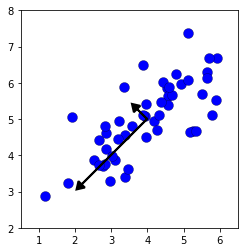

In [35]:
#Applying Normalisation to X before applying PCA
X_norm, mu, sigma= utils.featureNormalize(X)

#Run PCA
U, S= pca(X_norm)

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

In [45]:
grader[3]=pca
grader.grade()


Submitting Solutions | Programming Exercise k-means-clustering-and-pca

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
           Find Closest Centroids (k-Means) |  30 /  30 | Nice work!
           Compute Centroid Means (k-Means) |  30 /  30 | Nice work!
                                        PCA |  20 /  20 | Nice work!
                         Project Data (PCA) |   0 /  10 | 
                         Recover Data (PCA) |   0 /  10 | 
                                  --------------------------------
                                            |  80 / 100 |  



# 2.3 Dimensionality Reduction with PCA
After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space. In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

## 2.3.1 Projecting Data onto Principal Components


In [48]:
def projectData(X, U, K):
    Ureduced= U[:,:K] #K= no. of dimensions to reduce X to.
    
    Z= np.matmul(X, Ureduced) #z= Best approximation to X in the Column Space of Ureduced
    
    return Z

In [49]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.481274
(this value should be about    : 1.481274)


In [50]:
grader[4]= projectData
grader.grade()


Submitting Solutions | Programming Exercise k-means-clustering-and-pca

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
           Find Closest Centroids (k-Means) |  30 /  30 | Nice work!
           Compute Centroid Means (k-Means) |  30 /  30 | Nice work!
                                        PCA |  20 /  20 | Nice work!
                         Project Data (PCA) |  10 /  10 | Nice work!
                         Recover Data (PCA) |   0 /  10 | 
                                  --------------------------------
                                            |  90 / 100 |  



## 2.3.2 Reconstructing an Aprroximation of the Data
It can be done by reprojecting the lower dimensional data back into the hugher dimensional space

In [56]:
def recoverData(Z, U, K):
    Ureduced= U[:,:K]
    X_recovered= np.matmul(Z, Ureduced.transpose())
    
    return X_recovered

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


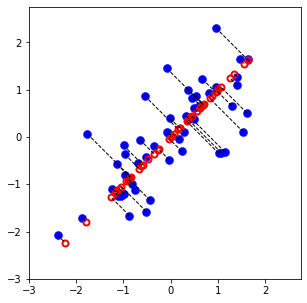

In [60]:
X_recovered= recoverData(Z,U,K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_recovered[0, 0], X_recovered[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_recovered[:, 0], X_recovered[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_recovered):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

In [61]:
grader[5]=recoverData
grader.grade()


Submitting Solutions | Programming Exercise k-means-clustering-and-pca

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
           Find Closest Centroids (k-Means) |  30 /  30 | Nice work!
           Compute Centroid Means (k-Means) |  30 /  30 | Nice work!
                                        PCA |  20 /  20 | Nice work!
                         Project Data (PCA) |  10 /  10 | Nice work!
                         Recover Data (PCA) |  10 /  10 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



## 2.4 Face Dataset 
In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset ex7faces.mat contains a dataset X of face images, each $32 \times 32$ in grayscale. This dataset was based on a cropped version of the labeled faces in the wild dataset. Each row of X corresponds to one face image (a row vector of length 1024).

The next cell will load and visualize the first 100 of these face images similar to what is shown in this figure:

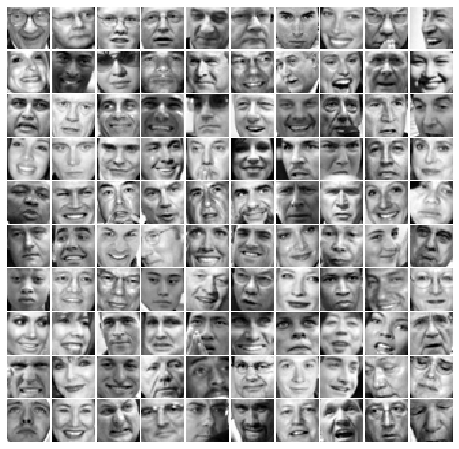

In [62]:
data= loadmat('ex7faces.mat')
X=data['X']
utils.displayData(X[:100,:], figsize=(8,8))

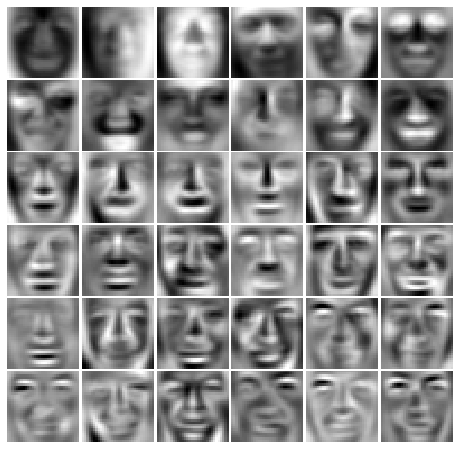

In [63]:
X_norm, mu, sigma= utils.featureNormalize(X)
U, S= pca(X_norm)

#  Visualize the top 36 eigenvectors found
utils.displayData(U[:, :36].T, figsize=(8, 8))

## 2.4.2 Dimensionality Reduction
Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

The next cell will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$. To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset.

In [64]:
K=100
Z= projectData(X_norm, U, K)
print('The projected data has a shape of:', Z.shape)

The projected data has a shape of: (5000, 100)


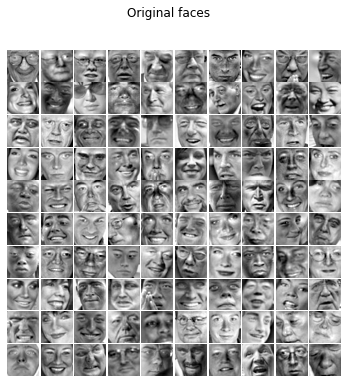

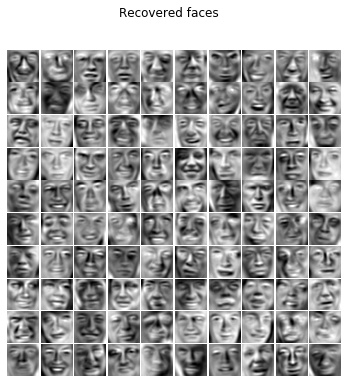

In [68]:
K=100
X_recovered= recoverData(Z, U, K)

# Display normalized data
utils.displayData(X_norm[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
utils.displayData(X_recovered[:100, :], figsize=(6, 6))
plt.gcf().suptitle('Recovered faces')
pass

# 2.5 Optional PCA Exercise
In the earlier K-means image compression exercise, you used the K-means algorithm in the 3-dimensional RGB space. We reduced each pixel of the RGB image to be represented by 16 clusters. In the next cell, we have provided code to visualize the final pixel assignments in this 3D space. Each data point is colored according to the cluster it has been assigned to. You can drag your mouse on the figure to rotate and inspect this data in 3 dimensions.

<IPython.core.display.Javascript object>


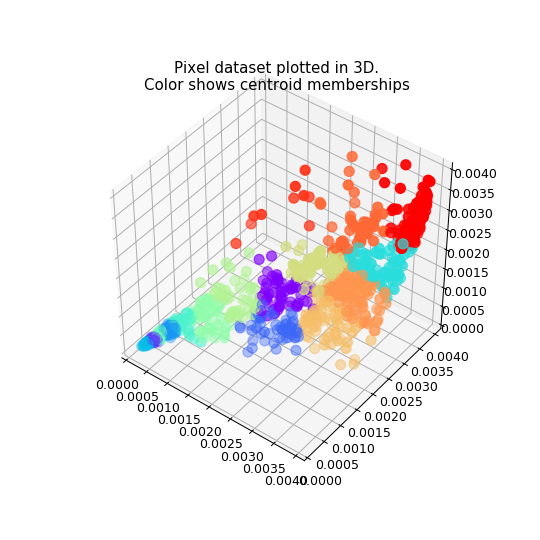

In [71]:
# this allows to have interactive plot to rotate the 3-D plot
# The double identical statement is on purpose
# see: https://stackoverflow.com/questions/43545050/using-matplotlib-notebook-after-matplotlib-inline-in-jupyter-notebook-doesnt
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt


A = mpl.image.imread('bird_small.png')
A /= 255
X = A.reshape(-1, 3)

# perform the K-means clustering again here
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = utils.runkMeans(X, initial_centroids,
                                 findClosestCentroids,
                                 computeCentroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = np.random.choice(X.shape[0], size=1000)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], cmap='rainbow', c=idx[sel], s=8**2)
ax.set_title('Pixel dataset plotted in 3D.\nColor shows centroid memberships')
pass


It turns out that visualizing datasets in 3 dimensions or greater can be cumbersome. Therefore, it is often desirable to only display the data in 2D even at the cost of losing some information. In practice, PCA is often used to reduce the dimensionality of data for visualization purposes.

In the next cell,we will apply your implementation of PCA to the 3-dimensional data to reduce it to 2 dimensions and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the “best” view.

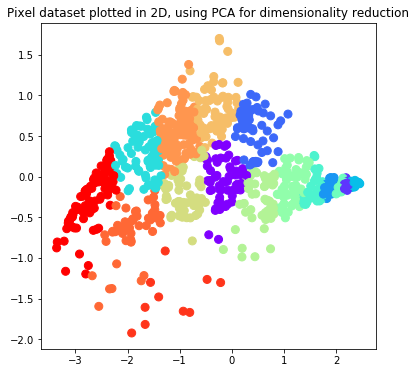

In [72]:
X_norm, mu, sigma = utils.featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Reset matplotlib to non-interactive
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(Z[sel, 0], Z[sel, 1], cmap='rainbow', c=idx[sel], s=64)
ax.set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
ax.grid(False)
pass